In [15]:
import PyCC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [6, 4]

plot_pretty()

In [16]:
test_dist = PyCC.Distributions.Uniform(r=10,n=1000,p=10)
vectors = PyCC.random_vectors(10)
xs = []
ys = []

In [17]:
for vec in vectors:
    ray = PyCC.ray(vec,20,25)
    out,stats = PyCC.evaluate(df=test_dist,evaluate_at=ray,save=False)
    phis = out.loc[:,"phi"].to_numpy()
    positions = out.loc[:,["x","y","z"]]
    rs = PyCC.points2radius(positions)
    xs.append(rs)
    ys.append(phis)

In [18]:
ana_ray = PyCC.ray(np.array([1,0,0]),20,100)
ana_rs = PyCC.points2radius(ana_ray)
analytics = PyCC.Analytic.Uniform(r=10,p=10,positions=ana_ray)

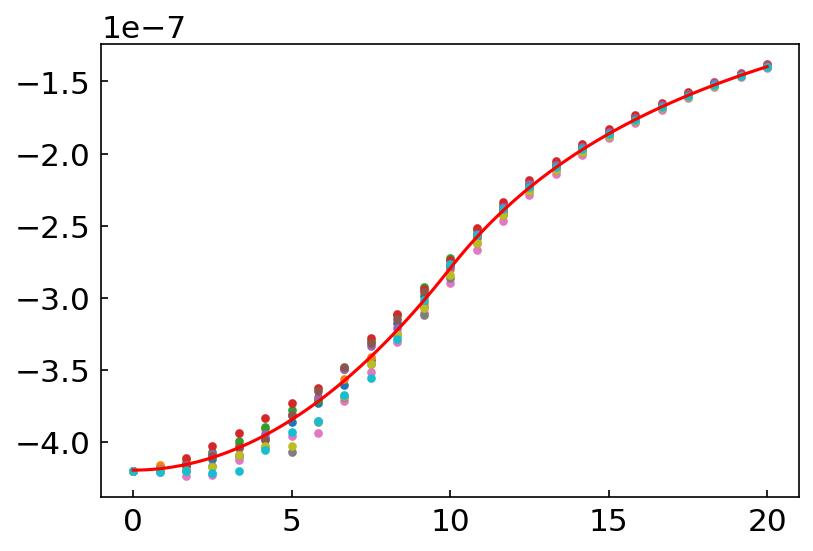

In [19]:
for x,y in zip(xs,ys):
    plt.scatter(x,y,zorder=0,s=10)
plt.plot(ana_rs,analytics,color="red",zorder=1)
plt.show()